<a href="https://colab.research.google.com/github/ramrajv/Upgrad_Pt_2/blob/main/Kmeans/Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [18]:
# read the dataset
url = 'https://raw.githubusercontent.com/ramrajv/Upgrad_Pt_2/main/Kmeans/Cricket.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [19]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


# 2. Fit data

In [20]:
# new column: amount 
df_c = df[['Ave','SR']]

In [21]:
# 2. rescaling
rfm_df = df[['Ave','SR']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [22]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Ave', 'SR']
rfm_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


# 4. Modelling

In [23]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [24]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[-0.52947693,  1.50882994],
       [ 0.50346811, -0.35929434],
       [-0.77768045, -0.53542111],
       [ 1.87424204,  0.91033805]])

In [26]:
cl_centres = kmeans.cluster_centers_

In [27]:
# Unscale

cl_centres*[df['SR'].std() + df['SR'].mean(),df['Ave'].std()+df['Ave'].mean()]

array([[-47.24026172,  67.05599994],
       [ 44.91973855, -15.9678971 ],
       [-69.38513532, -23.79539087],
       [167.22104384,  40.45759325]])

In [ ]:
df.loc[:,'labels'] = kmeans.labels_

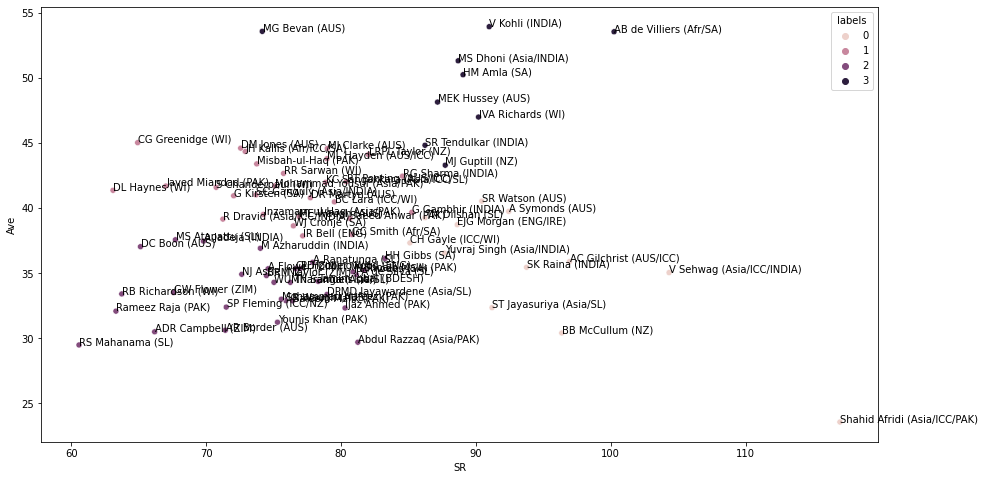

In [ ]:
from seaborn import colors
plt.figure(figsize = (15,8))
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.SR, df.Ave, df.Player, plt.gca())  
sns.scatterplot(x = 'SR', y = 'Ave', hue = 'labels', data = df)

In [ ]:
df.loc[df['Player'].str.contains('kohli', case = False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,labels
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3


In [ ]:
df['Player'][df['labels']==3]

0        SR Tendulkar (INDIA)
13      MS Dhoni (Asia/INDIA)
15    AB de Villiers (Afr/SA)
25            V Kohli (INDIA)
34               HM Amla (SA)
38             MG Bevan (AUS)
42          IVA Richards (WI)
63            MJ Guptill (NZ)
64           MEK Hussey (AUS)
Name: Player, dtype: object

In [ ]:
df['labels'].unique()

array([3, 1, 0, 2], dtype=int32)

In [ ]:
cl_0sr = df[df['labels']==0]['SR'].mean()
cl_0ave = df[df['labels']==0]['Ave'].mean()

cl_1sr = df[df['labels']==1]['SR'].mean()
cl_1ave = df[df['labels']==1]['Ave'].mean()

cl_2sr = df[df['labels']==2]['SR'].mean()
cl_2ave = df[df['labels']==2]['Ave'].mean()

cl_3sr = df[df['labels']==3]['SR'].mean()
cl_3ave = df[df['labels']==3]['Ave'].mean()

print(cl_0sr, cl_0ave)
print(cl_1sr, cl_1ave)
print(cl_2sr, cl_2ave)
print(cl_3sr, cl_3ave)

94.17583333333334 35.40916666666667
75.75185185185185 41.48444444444445
74.01483870967742 33.94935483870968
88.27333333333334 49.54666666666666


In [ ]:
2-B
3-A
0-C
1-D

94.17583333333334

In [ ]:
df['Player'][df['labels']==3]

0        SR Tendulkar (INDIA)
13      MS Dhoni (Asia/INDIA)
15    AB de Villiers (Afr/SA)
25            V Kohli (INDIA)
34               HM Amla (SA)
38             MG Bevan (AUS)
42          IVA Richards (WI)
63            MJ Guptill (NZ)
64           MEK Hussey (AUS)
Name: Player, dtype: object